In [1]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import uuid


In [2]:
image_size = 56
# Configurable variables
NUM_EPOCHS = 50
NOISE_DIMENSION = image_size * image_size * 1
BATCH_SIZE = 32
TRAIN_ON_GPU = True
UNIQUE_RUN_ID = str(uuid.uuid4())
PRINT_STATS_AFTER_BATCH = 50
OPTIMIZER_LR = 0.0002
OPTIMIZER_BETAS = (0.5, 0.999)
GENERATOR_OUTPUT_IMAGE_SHAPE = image_size * image_size * 3


In [3]:

# Speed ups
torch.autograd.set_detect_anomaly(False)
torch.autograd.profiler.profile(False)
torch.autograd.profiler.emit_nvtx(False)
torch.backends.cudnn.benchmark = True

In [4]:
import os
from PIL import Image

class BananaDataset():
    
    def __init__(self,datset_dir,transform=None):
        # used to prepare the labels and images path
        self.training_dir = datset_dir 
        self.list_images = os.listdir (datset_dir)
        self.transform = transform

    def __getitem__(self,index):
        
        # getting the image path
        
        image1_path=os.path.join(self.training_dir,  self.list_images[index])
        #print ("image1_path : ", image1_path)
        # Loading the image
        img0 = Image.open(image1_path)
        img0 = img0.convert("RGB")
        
        # Apply image transformations
        if self.transform is not None:
            img0 = self.transform(img0)
        
        return img0
    
    def __len__(self):
        return len(self.list_images)

In [5]:
class BananaCucumberDataset():
    
    def __init__(self,input1_dir, input2_dir, transform=None):
        
        self.input1_dir = input1_dir
        self.input2_dir = input2_dir
        self.list_images1 = os.listdir (input1_dir)
        self.list_images2 = os.listdir (input2_dir)
        len1 = len (self.list_images1)
        len2 = len (self.list_images2)
        self.res_len = 0
        if len1 > len2:
            self.res_len = len2
        else:
            self.res_len = len1
        self.list_images1  = self.list_images1 [:self.res_len]
        self.list_images2  = self.list_images2 [:self.res_len]
        self.transform = transform

    def __getitem__(self,index):
        
        # getting the image path
        
        image1_path=os.path.join(self.input1_dir,  self.list_images1[index])
        #print ("image1_path : ", image1_path)
        # Loading the image
        img0 = Image.open(image1_path)
        img0 = img0.convert("RGB")
        
        image2_path=os.path.join(self.input2_dir,  self.list_images2[index])
        img1 = Image.open(image2_path)
        img1 = img1.convert("RGB")
        
        # Apply image transformations
        if self.transform is not None:
            img0 = self.transform(img0)
            img1 = self.transform(img1)
        
        return img0, img1
    
    def __len__(self):
        return self.res_len

In [6]:
banana_images_dir = "./datasets/banana2cucumber/trainA/"
transform_train =transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Resize ((image_size, image_size))
                        ])

dataset = BananaDataset( datset_dir = banana_images_dir , transform=transform_train)
trainloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


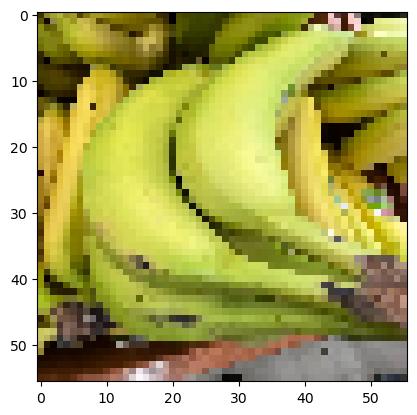

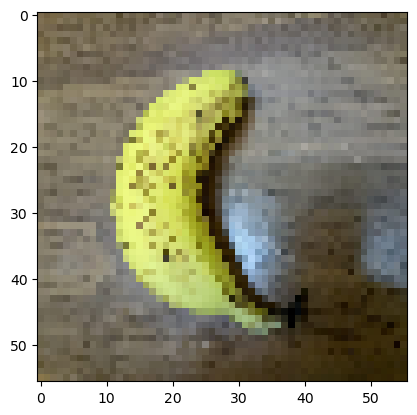

In [7]:
import matplotlib.pyplot as plt
data = next(iter(trainloader))

plt.imshow(data[0].permute((1,2,0)).numpy())
plt.show()

plt.imshow(data[1].permute((1,2,0)).numpy())
plt.show()

In [8]:
targetA_images_dir = "./datasets/banana2cucumber/trainA/"
targetB_images_dir = "./datasets/banana2cucumber/trainB/"
transform_train =transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Resize ((image_size, image_size))
                        ])

dataset2 = BananaCucumberDataset( input1_dir = targetA_images_dir , input2_dir = targetB_images_dir , transform=transform_train)
trainloader2 = torch.utils.data.DataLoader(dataset2, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)

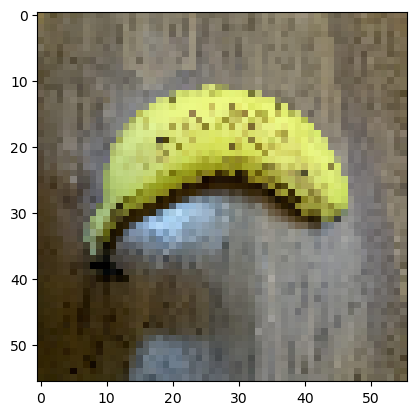

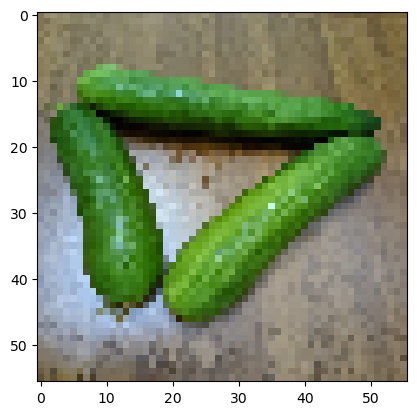

In [9]:
data1, data2 = next(iter(trainloader2))

plt.imshow(data1[0].permute((1,2,0)).numpy())
plt.show()

plt.imshow(data2[0].permute((1,2,0)).numpy())
plt.show()

In [10]:


def banana_dataset_loader():
  """ Prepare dataset through DataLoader """
  # Prepare MNIST dataset
  #dataset = MNIST(os.getcwd(), download=True, train=True, transform=transforms.Compose([
  #  transforms.ToTensor(),
  #  transforms.Normalize((0.5,), (0.5,))
  #]))
  # Batch and shuffle data with DataLoader
  targetA_images_dir = "./datasets/banana2cucumber/trainA/"
  targetB_images_dir = "./datasets/banana2cucumber/trainA/"
  transform_train =transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Resize ((image_size, image_size))
                            ])

  dataset = BananaDataset( datset_dir = targetA_images_dir , transform=transform_train)
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
  # Return dataset through DataLoader
  return trainloader


def banana_dataset_loader_2():
  """ Prepare dataset through DataLoader """
  # Prepare MNIST dataset
  #dataset = MNIST(os.getcwd(), download=True, train=True, transform=transforms.Compose([
  #  transforms.ToTensor(),
  #  transforms.Normalize((0.5,), (0.5,))
  #]))
  # Batch and shuffle data with DataLoader
  targetA_images_dir = "./datasets/banana2cucumber/trainA/"
  targetB_images_dir = "./datasets/banana2cucumber/trainB/"
  transform_train =transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Resize ((image_size, image_size))
                            ])

  dataset = BananaCucumberDataset( input1_dir = targetA_images_dir , input2_dir = targetB_images_dir , transform=transform_train)
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
  # Return dataset through DataLoader
  return trainloader

In [11]:
def prepare_dataset():
  """ Prepare dataset through DataLoader """
  # Prepare MNIST dataset
  dataset = MNIST(os.getcwd(), download=True, train=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
  ]))
  # Batch and shuffle data with DataLoader
  trainloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
  # Return dataset through DataLoader
  return trainloader

In [12]:

class Generator(nn.Module):

  def __init__(self,):
    super().__init__()
    self.layers = nn.Sequential(
      # First upsampling
      nn.Linear(NOISE_DIMENSION, 128, bias=False),
      nn.BatchNorm1d(128, 0.8),
      nn.LeakyReLU(0.25),
      # Second upsampling
      nn.Linear(128, 256, bias=False),
      nn.BatchNorm1d(256, 0.8),
      nn.LeakyReLU(0.25),
      # Third upsampling
      nn.Linear(256, 512, bias=False),
      nn.BatchNorm1d(512, 0.8),
      nn.LeakyReLU(0.25),
      # Final upsampling
      nn.Linear(512, GENERATOR_OUTPUT_IMAGE_SHAPE, bias=False),
      nn.Tanh()
    )

  def forward(self, x):
    return self.layers(x)


class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(GENERATOR_OUTPUT_IMAGE_SHAPE, 1024), 
      nn.LeakyReLU(0.25),
      nn.Linear(1024, 512), 
      nn.LeakyReLU(0.25),
      nn.Linear(512, 256), 
      nn.LeakyReLU(0.25),
      nn.Linear(256, 1),
      nn.Sigmoid()
    )

  def forward(self, x):
    return self.layers(x)


def get_device():
  """ Retrieve device based on settings and availability. """
  #return torch.device("cuda:0" if torch.cuda.is_available() and TRAIN_ON_GPU else "cpu")
  return "cpu"
    
    
def make_directory_for_run():
  """ Make a directory for this training run. """
  print(f'Preparing training run {UNIQUE_RUN_ID}')
  if not os.path.exists('./runs'):
    os.mkdir('./runs')
  os.mkdir(f'./runs/{UNIQUE_RUN_ID}')


def generate_image(generator, epoch = 0, batch = 0, device=get_device()):
  """ Generate subplots with generated examples. """
  images = []
  noise = generate_noise(BATCH_SIZE, device=device)
  #print ("---------", noise.shape)
  generator.eval()
  images = generator(noise)
  plt.figure(figsize=(10, 10))
  for i in range(2):
    # Get image
    image = images[i]
    # Convert image back onto CPU and reshape
    image = image.cpu().detach().numpy()
    image = np.reshape(image, (image_size, image_size, 3))
    # Plot
    plt.subplot(4, 4, i+1)
    plt.imshow(image)
    plt.axis('off')
  if not os.path.exists(f'./runs/{UNIQUE_RUN_ID}/images'):
    os.mkdir(f'./runs/{UNIQUE_RUN_ID}/images')
  plt.savefig(f'./runs/{UNIQUE_RUN_ID}/images/epoch{epoch}_batch{batch}.jpg')


def save_models(generator, discriminator, epoch):
  """ Save models at specific point in time. """
  torch.save(generator.state_dict(), f'./runs/{UNIQUE_RUN_ID}/generator_{epoch}.pth')
  torch.save(discriminator.state_dict(), f'./runs/{UNIQUE_RUN_ID}/discriminator_{epoch}.pth')


def print_training_progress(batch, generator_loss, discriminator_loss):
  """ Print training progress. """
  print('Losses after mini-batch %5d: generator %e, discriminator %e' %
        (batch, generator_loss, discriminator_loss))


def initialize_models(device = get_device()):
  """ Initialize Generator and Discriminator models """
  generator = Generator()
  discriminator = Discriminator()
  # Move models to specific device
  generator.to(device)
  discriminator.to(device)
  # Return models
  return generator, discriminator


def initialize_loss():
  """ Initialize loss function. """
  return nn.BCELoss()


def initialize_optimizers(generator, discriminator):
  """ Initialize optimizers for Generator and Discriminator. """
  generator_optimizer = torch.optim.AdamW(generator.parameters(), lr=OPTIMIZER_LR,betas=OPTIMIZER_BETAS)
  discriminator_optimizer = torch.optim.AdamW(discriminator.parameters(), lr=OPTIMIZER_LR,betas=OPTIMIZER_BETAS)
  return generator_optimizer, discriminator_optimizer
  

def generate_noise(number_of_images = 1, noise_dimension = NOISE_DIMENSION, device=None):
  """ Generate noise for number_of_images images, with a specific noise_dimension """
  return torch.randn(number_of_images, noise_dimension, device=device)


def efficient_zero_grad(model):
  """ 
    Apply zero_grad more efficiently
    Source: https://betterprogramming.pub/how-to-make-your-pytorch-code-run-faster-93079f3c1f7b
  """
  for param in model.parameters():
    param.grad = None


def forward_and_backward(model, data, loss_function, targets):
  """
    Perform forward and backward pass in a generic way. Returns loss value.
  """
  outputs = model(data)
  error = loss_function(outputs, targets)
  error.backward()
  return error.item()


def perform_train_step(generator, discriminator, real_data, noise, \
  loss_function, generator_optimizer, discriminator_optimizer, device = get_device()):
  """ Perform a single training step. """
  
  # 1. PREPARATION
  # Set real and fake labels.
  real_label, fake_label = 1.0, 0.0
  # Get images on CPU or GPU as configured and available
  # Also set 'actual batch size', whih can be smaller than BATCH_SIZE
  # in some cases.
  real_images = real_data[0].to(device)
  #print (real_images.shape)
  actual_batch_size = real_images.size(0)
  label = torch.full((actual_batch_size,1), real_label, device=device)
  
  # 2. TRAINING THE DISCRIMINATOR
  # Zero the gradients for discriminator
  efficient_zero_grad(discriminator)
  # Forward + backward on real images, reshaped
  real_images = real_images.view(real_images.size(0), -1)
  #real_images = real_images.view(-1, GENERATOR_OUTPUT_IMAGE_SHAPE)
  #print ("333333 ", real_images.shape)
  error_real_images = forward_and_backward(discriminator, real_images, \
    loss_function, label)
  # Forward + backward on generated images
  #print ("here 1")
  noise = generate_noise(actual_batch_size, device=device)
  #print ("here 2")
  generated_images = generator(noise)
  #print ("here 3")
  label.fill_(fake_label)
  error_generated_images =forward_and_backward(discriminator, \
    generated_images.detach(), loss_function, label)
  # Optim for discriminator
  discriminator_optimizer.step()
  
  # 3. TRAINING THE GENERATOR
  # Forward + backward + optim for generator, including zero grad
  efficient_zero_grad(generator)
  label.fill_(real_label)
  error_generator = forward_and_backward(discriminator, generated_images, loss_function, label)
  generator_optimizer.step()
  
  # 4. COMPUTING RESULTS
  # Compute loss values in floats for discriminator, which is joint loss.
  error_discriminator = error_real_images + error_generated_images
  # Return generator and discriminator loss so that it can be printed.
  return error_generator, error_discriminator
  

def perform_epoch(dataloader, generator, discriminator, loss_function, \
    generator_optimizer, discriminator_optimizer, epoch):
  """ Perform a single epoch. """
  for batch_no, real_data in enumerate(dataloader, 0):
    # Perform training step
    #print (batch_no, real_data[0].shape, real_data[1].shape,)
    generator_loss_val, discriminator_loss_val = perform_train_step(generator, \
      discriminator, real_data, real_data[1], loss_function, \
      generator_optimizer, discriminator_optimizer)
    # Print statistics and generate image after every n-th batch
    if batch_no % PRINT_STATS_AFTER_BATCH == 0:
      print_training_progress(batch_no, generator_loss_val, discriminator_loss_val)
      generate_image(generator, epoch, batch_no)
  # Save models on epoch completion.
  save_models(generator, discriminator, epoch)
  # Clear memory after every epoch
  torch.cuda.empty_cache()
  

def train_dcgan():
  """ Train the DCGAN. """
  # Make directory for unique run
  make_directory_for_run()
  # Set fixed random number seed
  torch.manual_seed(42)
  # Get prepared dataset
  dataloader = banana_dataset_loader_2()
  # Initialize models
  generator, discriminator = initialize_models()

  
  # Initialize loss and optimizers
  loss_function = initialize_loss()
  generator_optimizer, discriminator_optimizer = initialize_optimizers(generator, discriminator)
  # Train the model
  for epoch in range(NUM_EPOCHS):
    print(f'Starting epoch {epoch}...')
    perform_epoch(dataloader, generator, discriminator, loss_function, \
      generator_optimizer, discriminator_optimizer, epoch)
  # Finished :-)
  print(f'Finished unique run {UNIQUE_RUN_ID}')
  return generator, discriminator 


In [13]:
import shutil

Preparing training run 07b154c0-425c-4b25-a6ae-9e3d07848387
Starting epoch 0...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.123421e-01, discriminator 1.377361e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 1...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.056591e-01, discriminator 7.517419e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 2...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.840217e-01, discriminator 7.161742e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 3...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.638746e-01, discriminator 7.502110e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 4...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.825868e-01, discriminator 7.639493e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 5...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.131315e-01, discriminator 7.486424e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.351187e-01, discriminator 7.329647e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 7...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.112332e-01, discriminator 8.114153e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 8...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.985647e-01, discriminator 1.061480e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 9...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.035997e-01, discriminator 1.070617e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 10...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.061757e-01, discriminator 1.045623e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 11...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.378315e-01, discriminator 1.016740e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 12...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 8.138356e-01, discriminator 9.564792e-01
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 13...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 1.022011e+00, discriminator 1.220684e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 14...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 3.889590e-01, discriminator 1.579123e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 15...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.006485e-01, discriminator 1.270319e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 16...
0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.560170e-01, discriminator 1.213844e+00


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 17...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.032735e-01, discriminator 1.167975e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 18...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.962207e-01, discriminator 1.105030e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 19...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 1.851201e-01, discriminator 1.553705e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 20...


/tmp/ipykernel_2037877/3206981470.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.996329e-01, discriminator 1.501749e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 21...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.210656e-01, discriminator 1.342518e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 22...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.628542e-01, discriminator 1.299888e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 23...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.924510e-01, discriminator 1.257972e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 24...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 4.933740e-01, discriminator 1.304821e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 25...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.435834e-01, discriminator 1.400153e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 26...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.948185e-01, discriminator 1.427102e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 27...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.050792e-01, discriminator 1.393858e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 28...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.666101e-01, discriminator 1.316335e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 29...
0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 9.658149e-01, discriminator 1.320008e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 30...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 1.084306e+00, discriminator 1.585692e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 31...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 5.672478e-01, discriminator 1.475277e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 32...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.791644e-01, discriminator 1.405997e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 33...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 8.011252e-01, discriminator 1.309119e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 34...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.697601e-01, discriminator 1.243558e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 35...
0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 2.832818e-01, discriminator 1.359000e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 36...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.274848e-01, discriminator 1.521632e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 37...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.660055e-01, discriminator 1.426394e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 38...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.683958e-01, discriminator 1.400791e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 39...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 1.070670e+00, discriminator 1.313830e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 40...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 1.255744e+00, discriminator 1.399769e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 41...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 8.805612e-01, discriminator 1.433690e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 42...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.876962e-01, discriminator 1.322958e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 43...
0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.422792e-01, discriminator 1.297886e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 44...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 6.816022e-01, discriminator 1.363630e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 45...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 3.252990e-01, discriminator 1.839222e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 46...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 1.071769e+00, discriminator 1.388979e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 47...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.089394e-01, discriminator 1.243026e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 48...
0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 7.265778e-01, discriminator 1.192818e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Starting epoch 49...
0 torch.Size([32, 3, 56, 56]) torch.Size([32, 3, 56, 56])
Losses after mini-batch     0: generator 3.246805e-01, discriminator 1.436026e+00
1 torch.Size([21, 3, 56, 56]) torch.Size([21, 3, 56, 56])
Finished unique run 07b154c0-425c-4b25-a6ae-9e3d07848387


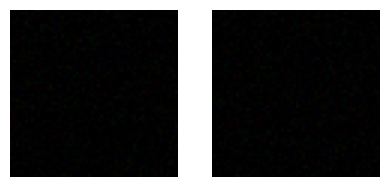

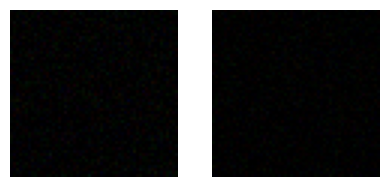

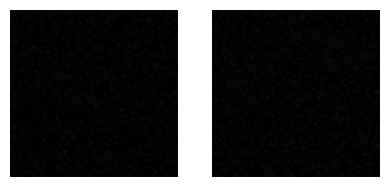

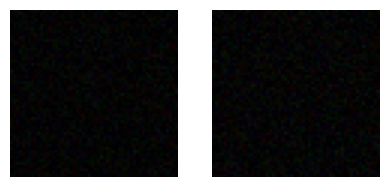

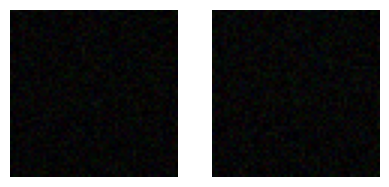

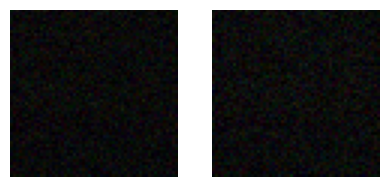

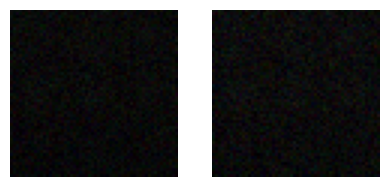

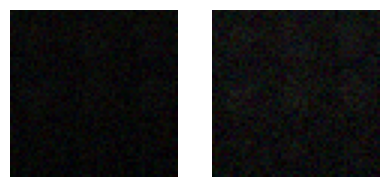

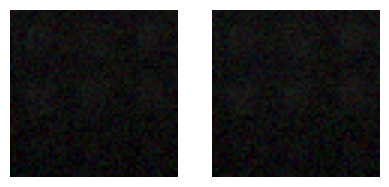

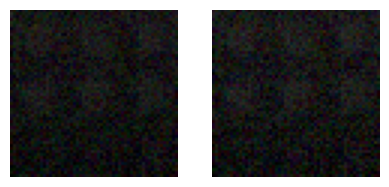

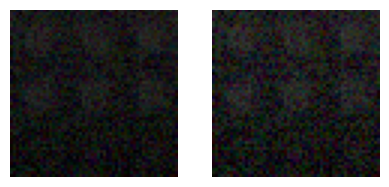

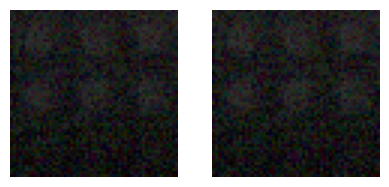

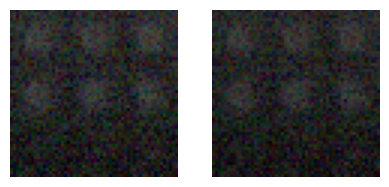

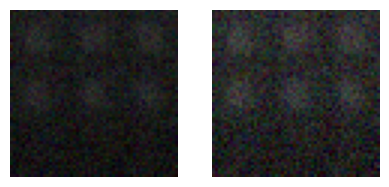

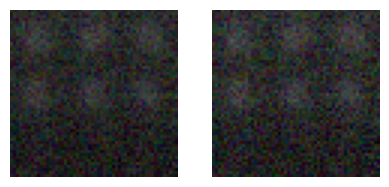

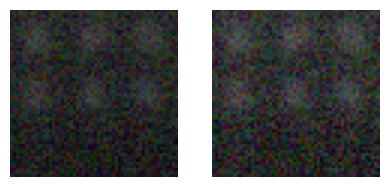

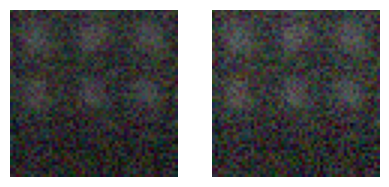

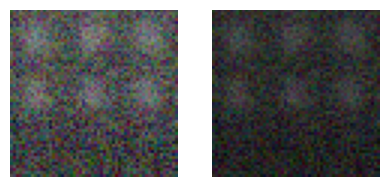

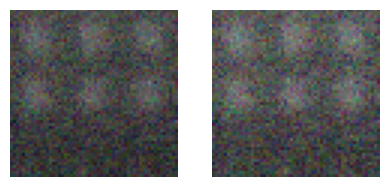

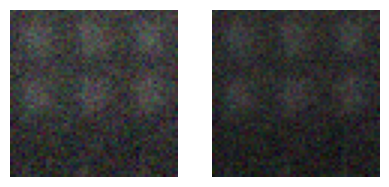

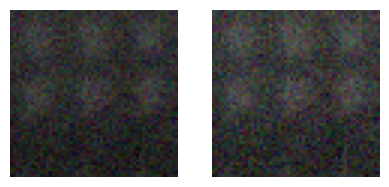

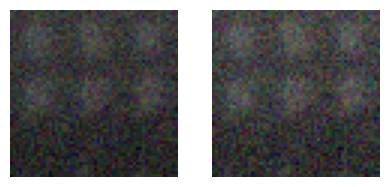

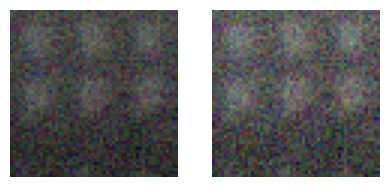

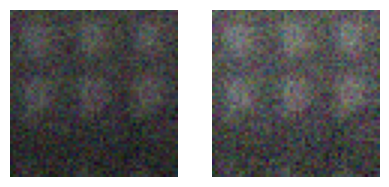

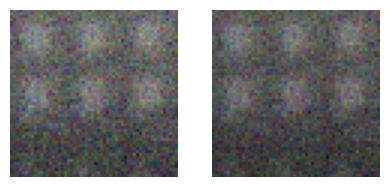

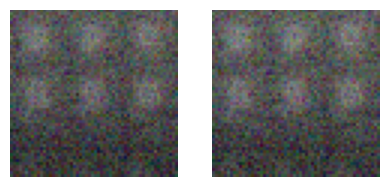

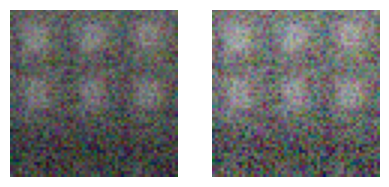

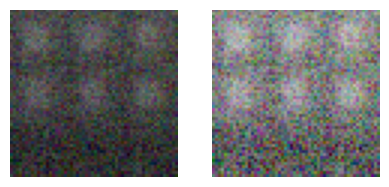

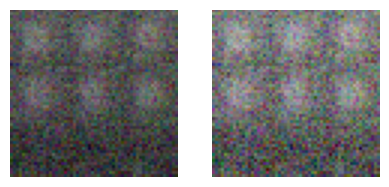

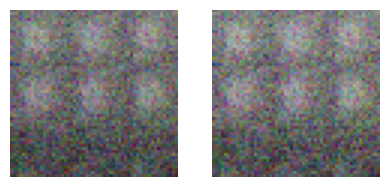

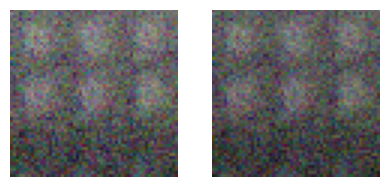

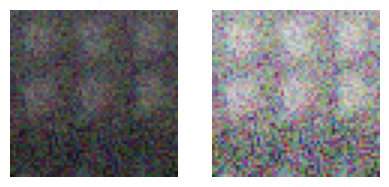

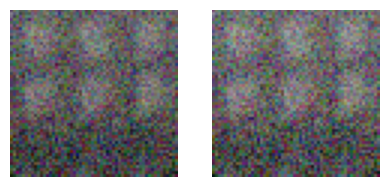

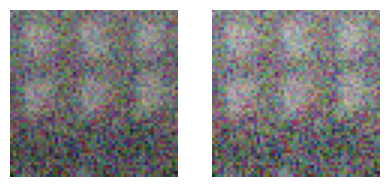

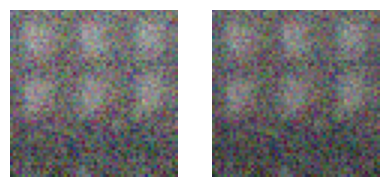

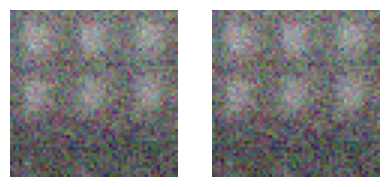

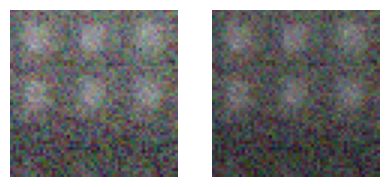

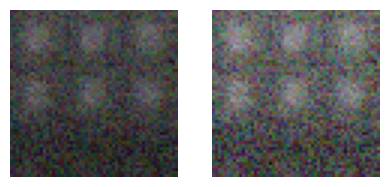

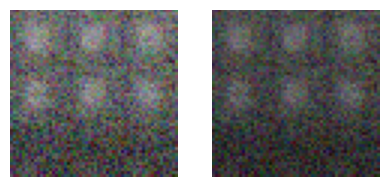

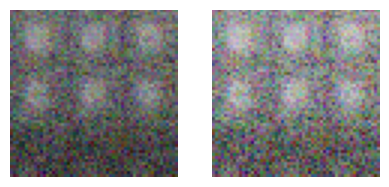

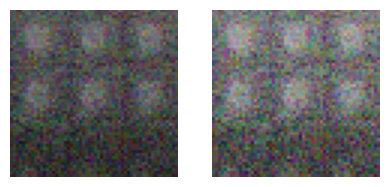

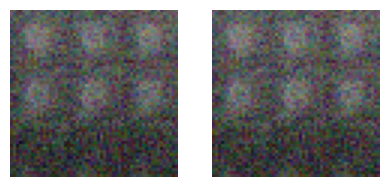

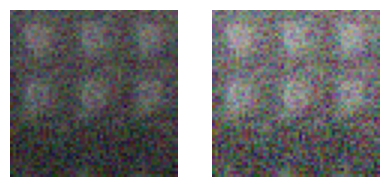

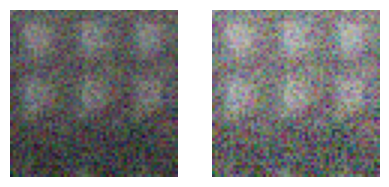

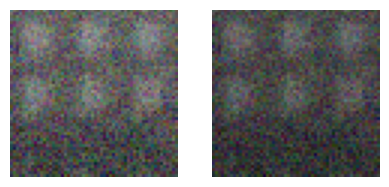

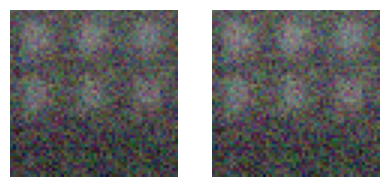

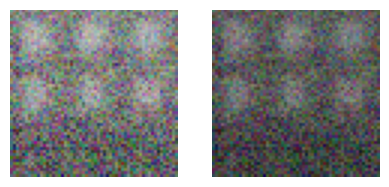

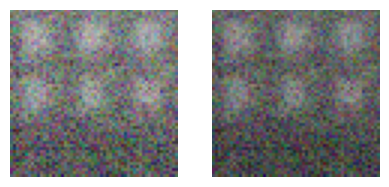

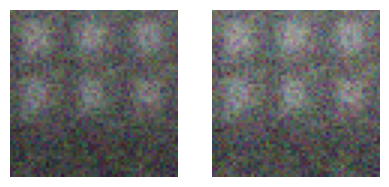

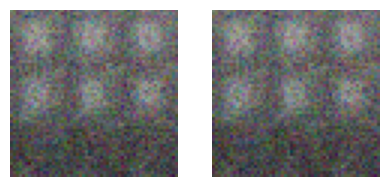

In [14]:
run_path = "./runs"
if os.path.exists (run_path):
    #os.rmdir(run_path)
    shutil.rmtree (run_path)
generator, discriminator = train_dcgan()